# 1. 데이터 가져오기

In [1]:
import sqlite3
import pandas as pd

In [20]:
conn = sqlite3.connect('../polls/scraping_db/wadizdb.sqlite3')
cur = conn.cursor()

In [21]:
total_data=pd.read_sql('select * from  table_culture', con = conn)

In [22]:
total_data.head(10)

,star grade,review
0,5.0,"저희 지역이 택배파업때문에 배송에 문제가 있었는데, 문의드린후 친절하게 응답해주시고..."
1,5.0,너무 좋아요 😃😃😃
2,5.0,너무 좋아요 고퀄ㅠㅠ
3,1.5,배송문제(택배사 파업)로 사전에도 문의드렸으나 운송장번호도 잘못입력되고 우여곡절 끝...
4,4.5,"사진 퀄리티는 좋은데 첫 장 부분 속지가 울어있더라구요,,,귀찮아서 교환은 안했는데..."
5,4.0,"사진들이 방송에 나온것과 많이 다르지 않음.\n제작, 배송도 늦음.\n내 가수 얼굴..."
6,5.0,불편한점이 없이 다 만족스러웠습니다. 감사합니다~^^
7,4.0,좋은 퀄리티로 늦어진다 안내는 받았는데 기다린 보람은 있게 퀄리티는 좋지만.. 검수...
8,5.0,배송도 빨리 오고 너무너무 이뻐요~~!♡♡
9,5.0,너무 잘 받았습니다. 배송일정이 늦어진건 아쉬웠지만 받아보니 퀄리티가 너무 좋네요~


In [23]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   star grade  1500 non-null   float64
 1   review      1500 non-null   object 
dtypes: float64(1), object(1)
memory usage: 23.6+ KB


In [ ]:
len(total_data)  # null 값 없음을 알수있다.

15468

# 2. 데이터 전처리

In [ ]:
x_data = total_data['review']
y_data = total_data['star grade']

## y_data 전처리
: rate의 범위를 [1,2,3,4,5]로 만들기 위해 소수점 rate 처리

In [ ]:
def make_y_data(val):
    if (1 <= val < 2):
        return 1
    elif (2 <= val < 3):
        return 2
    elif (3 <= val < 4):
        return 3
    elif (4 <= val < 5):
        return 4
    elif (5 <= val < 6):
        return 5
    else:
        return None

In [ ]:
y_data = y_data.apply(lambda val:make_y_data(val))

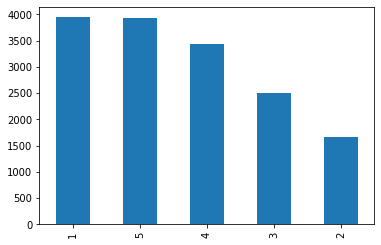

In [ ]:
y_data.value_counts().plot(kind='bar')

In [ ]:
y_data

0        1
1        5
2        5
3        2
4        4
        ..
15463    5
15464    5
15465    5
15466    5
15467    5
Name: star grade, Length: 15468, dtype: int64

## Split data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11601,), (11601,), (3867,), (3867,))

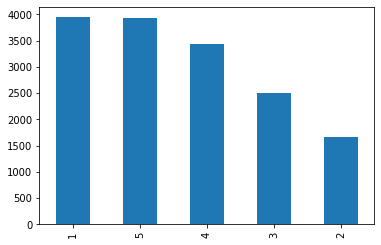

In [ ]:
y_data.value_counts().plot(kind='bar')

## NPL (테스트 전처리)

In [ ]:
!python -m pip install --upgrade pip

     |████████████████████████████████| 1.6 MB 14.0 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [ ]:
!python -m pip install konlpy 

     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 448 kB 44.8 MB/s 
     |████████████████████████████████| 86 kB 5.0 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  20419      0 --:--:-- --:--:-- --:--:-- 20419


In [ ]:
!bash ./mecab.sh

Installing automake (A dependency for mecab-ko)
Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Ign:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:10 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main Sources [1,790 kB]
Ign:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubun

In [ ]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ ]','')

3764     다른 블루투스 이어폰보다 음질도 풍부하고 공공장소에서의 연결 상태가 매우 좋았구요무...
9949     소음도 심하고 풍량도 적고 나름 첫 펀딩이었는데 와디즈를 떠나고 싶게 만드는 제품이...
6931     처음에 와파이연결하는게 힘들었네요ㅎㅎ 집와이파이를 끄고 이아이와 연결만한다고 씨름했...
6032     공통적인 채널이동간 묵음현상은 이 기기의 기본값인 듯 합니다 앤커측에서 이걸 몰랐다...
6624                     스트리에 약속한 그대로의 기능과 품질을 지켜주셔서 감사합니다
                               ...                        
7047     분명다른 기계랑틀린점은 피멍안들게 한다고 하지않았나요 시연하시는분 피부는 갑옷인지 ...
7732     친구 명이 모두 만족한 상품은 처음입니다일단 처음 박스부터 기분이 좋았습니다 이쁘니...
1098                                        가볍게 청소하기 딱 좋네요
6089        주로 블투로 연결하구요 휴대폰이랑은 음악을 프로젝터랑은 티비를 보는데 뭐 잘 됩니다
14005                            잘받았습니다 추후 펌웨어 업그레이드가 중요할듯
Name: review, Length: 11601, dtype: object

In [ ]:
from konlpy.tag import Mecab

In [ ]:
mecab = Mecab()

In [ ]:
stopwords = ['의', '은', '는', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리'
, '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나'
, '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨'
, '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내'
, '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들'
, '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓', '걍', '과', '를', '으로', '자', '에', '와', '한', '하다']

In [ ]:
import pickle

In [ ]:
# pickle.dump(stopwords, open('./files/stopwords.pkl','wb'))

In [ ]:
sentence = list()

for tok in x_train:
  encoded = mecab.morphs(tok)
  sentence.append([item for item in encoded if item not in stopwords])

sentence

[['블루투스',
  '이어폰',
  '보다',
  '음질',
  '도',
  '풍부',
  '고',
  ',',
  '공공',
  '장소',
  '에서',
  '연결',
  '상태',
  '매우',
  '았',
  '구요',
  '무엇',
  '보다',
  '디자인',
  '제일',
  '맘',
  '었',
  '어요',
  '~!!',
  '배송',
  '살짝',
  '늦',
  '거',
  '빼',
  '고',
  '았',
  '어요',
  '!',
  '!'],
 ['소음',
  '도',
  '심하',
  '고',
  '풍',
  '량',
  '도',
  '고',
  '나름',
  '첫',
  '펀딩',
  '었',
  '는데',
  '디즈',
  '떠나',
  '고',
  '게',
  '만드',
  '제품',
  '네요',
  '내년',
  '교환',
  '라고',
  '했',
  '는데',
  '그럼',
  '올해',
  '그냥',
  '선풍기',
  '사',
  '서',
  '쓰',
  '라는',
  '거',
  '밖에',
  '은데',
  '돈',
  '만',
  '쓰',
  '겠',
  '네요',
  '.',
  '덕분',
  '펀딩',
  '부정',
  '인식',
  '만',
  '남기',
  '고',
  '갑니다',
  '.',
  '해당',
  '브랜드',
  '주변',
  '소문',
  '다',
  '고',
  '절대',
  '이용',
  '못',
  '게',
  '할',
  '겁니다',
  '내년',
  '무상',
  '지급',
  '한다고',
  '했',
  '는데',
  '식',
  '펀딩',
  '참여',
  '을',
  '취합',
  '고',
  '발송',
  '해',
  '려는지',
  '도',
  '궁금',
  '네요',
  '1',
  '간',
  '개인',
  '정보',
  '보관',
  '겠',
  '다는',
  '건가요'],
 ['처음',
  '파이',
  '연결',
  '게',
  '힘들',
  '었',
  '네요'

## Tokenizer

In [ ]:
import tensorflow as tf

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [ ]:
tokenizer.fit_on_texts(sentence)

In [ ]:
tokenizer.word_index

{'.': 1,
 '고': 2,
 '도': 3,
 '을': 4,
 '습니다': 5,
 '네요': 6,
 '게': 7,
 ',': 8,
 '는데': 9,
 '제품': 10,
 '사용': 11,
 '했': 12,
 '면': 13,
 '해': 14,
 '로': 15,
 '다': 16,
 '합니다': 17,
 '어': 18,
 '만': 19,
 '에서': 20,
 '지만': 21,
 '기': 22,
 '거': 23,
 '겠': 24,
 '..': 25,
 '었': 26,
 '할': 27,
 '았': 28,
 '!': 29,
 '너무': 30,
 '쓰': 31,
 '만족': 32,
 '어요': 33,
 '펀딩': 34,
 '?': 35,
 '입니다': 36,
 '시': 37,
 '니': 38,
 '아요': 39,
 '해서': 40,
 '아': 41,
 '부분': 42,
 '보다': 43,
 '충전': 44,
 '1': 45,
 '2': 46,
 '저': 47,
 '분': 48,
 '라': 49,
 '어서': 50,
 ')': 51,
 '-': 52,
 '3': 53,
 '소음': 54,
 '(': 55,
 '던': 56,
 '인': 57,
 '음': 58,
 '서': 59,
 '제': 60,
 '아서': 61,
 '으면': 62,
 '~': 63,
 '연결': 64,
 '정말': 65,
 '많이': 66,
 '건': 67,
 '가격': 68,
 '까지': 69,
 '조금': 70,
 '그냥': 71,
 '다고': 72,
 '듯': 73,
 '환불': 74,
 '배송': 75,
 '못': 76,
 '긴': 77,
 '구매': 78,
 '기대': 79,
 '처음': 80,
 '디자인': 81,
 '요': 82,
 '다는': 83,
 '봤': 84,
 '면서': 85,
 '라고': 86,
 '디즈': 87,
 '괜찮': 88,
 '불편': 89,
 '기능': 90,
 '다가': 91,
 '된': 92,
 '바람': 93,
 '느낌': 94,
 '함': 95,
 '인데': 9

In [ ]:
tokenizer.word_counts

OrderedDict([('블루투스', 468),
             ('이어폰', 720),
             ('보다', 2194),
             ('음질', 652),
             ('도', 12451),
             ('풍부', 56),
             ('고', 19049),
             (',', 6880),
             ('공공', 8),
             ('장소', 30),
             ('에서', 3805),
             ('연결', 1397),
             ('상태', 523),
             ('매우', 503),
             ('았', 2996),
             ('구요', 875),
             ('무엇', 156),
             ('디자인', 1119),
             ('제일', 222),
             ('맘', 389),
             ('었', 3420),
             ('어요', 2742),
             ('~!!', 29),
             ('배송', 1210),
             ('살짝', 318),
             ('늦', 396),
             ('거', 3608),
             ('빼', 407),
             ('!', 2992),
             ('소음', 1661),
             ('심하', 258),
             ('풍', 179),
             ('량', 246),
             ('나름', 239),
             ('첫', 273),
             ('펀딩', 2731),
             ('는데', 6435),
             ('디즈', 1001),
      

In [ ]:
total_cnt = len(tokenizer.word_index)

rare_cnt = 0
total_freq, rare_freq = 0, 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value  # 전체 단어 수
  if (value <= 2):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value  # 2 미만의 수

In [ ]:
total_cnt, rare_cnt, rare_cnt/total_cnt, rare_freq/total_freq

(19927, 10873, 0.5456415918101069, 0.01994324128610086)

In [ ]:
vocab_size = total_cnt - rare_cnt

In [ ]:
vocab_size

9054

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')

In [ ]:
tokenizer.fit_on_texts(sentence)

In [ ]:
tokenizer.index_word

{1: 'OOV',
 2: '.',
 3: '고',
 4: '도',
 5: '을',
 6: '습니다',
 7: '네요',
 8: '게',
 9: ',',
 10: '는데',
 11: '제품',
 12: '사용',
 13: '했',
 14: '면',
 15: '해',
 16: '로',
 17: '다',
 18: '합니다',
 19: '어',
 20: '만',
 21: '에서',
 22: '지만',
 23: '기',
 24: '거',
 25: '겠',
 26: '..',
 27: '었',
 28: '할',
 29: '았',
 30: '!',
 31: '너무',
 32: '쓰',
 33: '만족',
 34: '어요',
 35: '펀딩',
 36: '?',
 37: '입니다',
 38: '시',
 39: '니',
 40: '아요',
 41: '해서',
 42: '아',
 43: '부분',
 44: '보다',
 45: '충전',
 46: '1',
 47: '2',
 48: '저',
 49: '분',
 50: '라',
 51: '어서',
 52: ')',
 53: '-',
 54: '3',
 55: '소음',
 56: '(',
 57: '던',
 58: '인',
 59: '음',
 60: '서',
 61: '제',
 62: '아서',
 63: '으면',
 64: '~',
 65: '연결',
 66: '정말',
 67: '많이',
 68: '건',
 69: '가격',
 70: '까지',
 71: '조금',
 72: '그냥',
 73: '다고',
 74: '듯',
 75: '환불',
 76: '배송',
 77: '못',
 78: '긴',
 79: '구매',
 80: '기대',
 81: '처음',
 82: '디자인',
 83: '요',
 84: '다는',
 85: '봤',
 86: '면서',
 87: '라고',
 88: '디즈',
 89: '괜찮',
 90: '불편',
 91: '기능',
 92: '다가',
 93: '된',
 94: '바람',
 95: '느낌',
 96: '

In [ ]:
# pickle.dump(tokenizer, open('./files/tokenizer.pkl','wb'))

## x_train 숫자화

In [ ]:
x_train = tokenizer.texts_to_sequences(sentence)

In [ ]:
print(x_train[0:3])

[[201, 116, 44, 140, 4, 1479, 3, 9, 4711, 2220, 21, 65, 183, 189, 29, 98, 649, 44, 82, 475, 249, 27, 34, 2279, 76, 324, 242, 24, 233, 3, 29, 34, 30, 30], [55, 4, 402, 3, 585, 418, 4, 3, 431, 380, 35, 27, 10, 88, 2076, 3, 8, 977, 11, 7, 1692, 171, 87, 13, 10, 1269, 2161, 72, 145, 114, 60, 32, 133, 24, 762, 120, 192, 20, 32, 25, 7, 2, 947, 35, 2616, 487, 20, 763, 3, 1315, 2, 965, 864, 595, 5982, 17, 3, 759, 441, 77, 8, 28, 847, 1692, 2694, 4712, 806, 13, 10, 525, 35, 645, 5, 6658, 3, 865, 15, 1, 4, 642, 7, 46, 781, 319, 1074, 999, 25, 84, 541], [81, 1, 65, 8, 375, 27, 7, 155, 1, 1081, 3, 1, 65, 20, 806, 3351, 13, 10, 335, 125, 7, 254, 1270, 1819, 159, 297, 24, 160, 36, 610, 66, 249, 34, 407, 890, 103, 344, 3623, 1, 78, 142, 1, 2695, 41, 1278, 95, 5983, 919, 407, 517, 1, 1844, 70, 4454, 159, 15, 1607, 4455, 7, 155, 1480, 41, 5035, 4, 4213, 1607, 83, 407, 856, 33, 3, 1195, 104, 25, 34, 407, 2415, 7606, 1992, 37]]


In [ ]:
hist_len = [len(words) for words in x_train]

(array([4.864e+03, 2.861e+03, 1.480e+03, 8.240e+02, 4.950e+02, 2.840e+02,
        1.780e+02, 1.480e+02, 1.000e+02, 7.600e+01, 5.000e+01, 4.900e+01,
        3.800e+01, 2.400e+01, 2.000e+01, 2.200e+01, 1.200e+01, 5.000e+00,
        8.000e+00, 1.300e+01, 3.000e+00, 5.000e+00, 5.000e+00, 6.000e+00,
        6.000e+00, 4.000e+00, 1.000e+00, 5.000e+00, 1.000e+00, 5.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([1.00000e+00, 2.77800e+01, 5.45600e+01, 8.13400e+01, 1.08120e+02,
        1.34900e+02, 1.61680e+02, 1.88460e+02, 2.15240e+02, 2.42020e+02,
        2.68800e+02, 2.95580e+02, 3.22360e+02, 3.49140e+02, 3.75920e+02,
        4.02700e+02, 4.29480e+02, 4.56260e+02, 4.83040e+02, 5.09820e+02,
        5.36600e+02, 5.63380e+02, 5.90160e+02, 6.16940e+02, 6.43720e+02,
        6.7

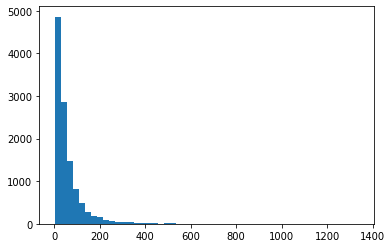

In [ ]:
import matplotlib.pyplot as plt
plt.hist(hist_len, bins=50)

### padding

In [ ]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=200)

In [ ]:
x_train

array([[   0,    0,    0, ...,   34,   30,   30],
       [   0,    0,    0, ...,   25,   84,  541],
       [   0,    0,    0, ..., 7606, 1992,   37],
       ...,
       [   0,    0,    0, ...,   23,  188,    7],
       [   0,    0,    0, ...,  126,  113,    2],
       [   0,    0,    0, ...,  686,   28,   74]], dtype=int32)

In [ ]:
import numpy as np
y_train = np.array(y_train)-1
np.unique(y_train)

array([0, 1, 2, 3, 4])

In [ ]:
len(x_train),len(y_train)

(11601, 11601)

# 3. Make model

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=30, input_length=200))  # input layer

# model.add(tf.keras.layers.LSTM(128))  # hidden layer
# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))  # hidden layer
model.add(tf.keras.layers.GRU(128), return_sequences=True)  # hidden layer
model.add(tf.keras.layers.GRU(64))  # hidden layer

model.add(tf.keras.layers.Dense(5, activation='softmax'))  # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])  # gadget

TypeError: ignored

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 30)           271620    
_________________________________________________________________
gru (GRU)                    (None, 128)               61440     
_________________________________________________________________
dense (Dense)                (None, 5)                 645       
Total params: 333,705
Trainable params: 333,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(x_train, y_train, epochs=500, batch_size=256, validation_split=0.3, shuffle=True)

Epoch 1/500
32/32 [==============================] - 21s 587ms/step - loss: 1.5624 - acc: 0.3347 - val_loss: 1.5354 - val_acc: 0.3407
Epoch 2/500
32/32 [==============================] - 18s 574ms/step - loss: 1.5186 - acc: 0.3922 - val_loss: 1.4254 - val_acc: 0.3964
Epoch 3/500
32/32 [==============================] - 18s 579ms/step - loss: 1.3657 - acc: 0.4329 - val_loss: 1.3645 - val_acc: 0.4188
Epoch 4/500
32/32 [==============================] - 18s 575ms/step - loss: 1.2558 - acc: 0.4613 - val_loss: 1.2487 - val_acc: 0.4614
Epoch 5/500
32/32 [==============================] - 18s 574ms/step - loss: 1.0990 - acc: 0.5165 - val_loss: 1.1802 - val_acc: 0.4910
Epoch 6/500
32/32 [==============================] - 18s 571ms/step - loss: 0.9999 - acc: 0.5679 - val_loss: 1.1715 - val_acc: 0.5004
Epoch 7/500
32/32 [==============================] - 18s 576ms/step - loss: 0.9041 - acc: 0.6148 - val_loss: 1.1786 - val_acc: 0.5045
Epoch 8/500
32/32 [==============================] - 18s 574ms

# 4. Evaluation

In [ ]:
# model.evaluate(x_train, y_train)  # Bidirection epochs 100 : - loss: 1.3254 - acc: 0.8286 -> (60s)

In [ ]:
# model.evaluate(x_train, y_train)  # GRU epochs 100 : - loss: 1.6015 - acc: 0.8201 -> 대신 훨씬 빠름 (32s)

In [ ]:
model.evaluate(x_train, y_train)  # GRU epochs 500 : - loss: 1.9807 - acc: 0.8355

363/363 [==============================] - 12s 33ms/step - loss: 1.9807 - acc: 0.8355


[1.9807353019714355, 0.8355314135551453]

# 5. Service

In [ ]:
model.save('./files/DL_tech.h5')

# 그래프로 값 비교

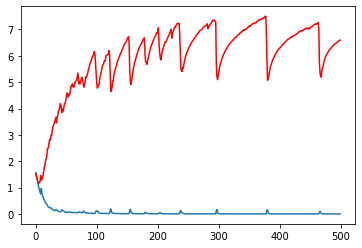

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],'-r')
plt.show()

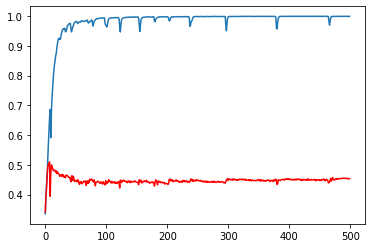

In [ ]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'],'-r')
plt.show()